In [117]:
import numpy as np
import pandas as pd

data visualization

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [119]:
from scipy import stats

**Bartlett's sphericity test**

In [120]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Testing and training data

In [122]:
from sklearn.model_selection import train_test_split


Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression


OLS

In [124]:
import statsmodels.api as sm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [125]:
csvFile = "stock portfolio performance data set.xlsx"

In [126]:
df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,13,14,15,16,17,18])

In [127]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [128]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [129]:
weights = df.columns[:6]
print(weights)

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')


In [130]:
outputs = df.columns[-6:]
print(outputs)

Index(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')


Outputs

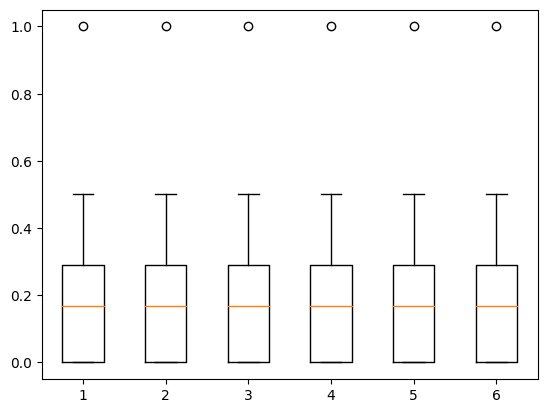

In [131]:
plt.boxplot(df.iloc[:,:6])
plt.show()

weigths

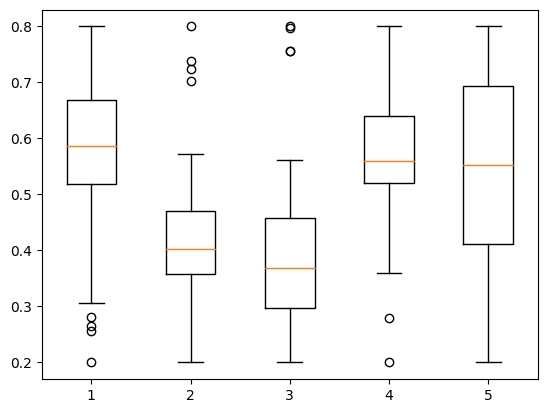

In [132]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [133]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [134]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(57, 12)

In [135]:
df[~(z_scores < threshold).all(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.490882,0.429063,0.20,0.235294


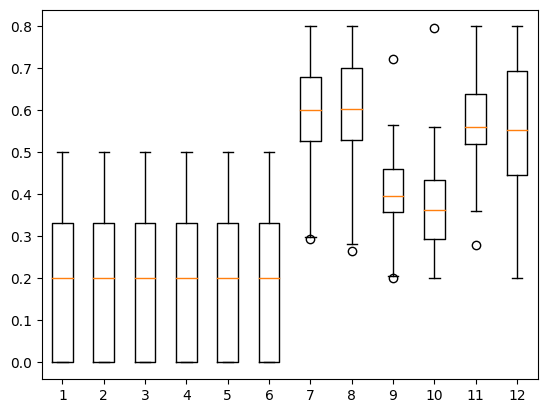

In [136]:
plt.boxplot(df_clean)
plt.show()

**Method 2** : IQR

In [137]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape


(54, 12)

In [138]:
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.000,0.000,0.000,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.000,0.000,0.000,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.000,0.000,0.000,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.000,0.000,0.000,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.000,1.000,0.000,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.000,0.000,1.000,0.200000,0.200000,0.490882,0.429063,0.20,0.235294
7,0.5,0.0,0.5,0.000,0.000,0.000,0.652186,0.594190,0.723655,0.797195,0.48,0.376471
15,0.0,0.0,0.0,0.500,0.500,0.000,0.298276,0.265715,0.549684,0.415240,0.52,0.341176
40,0.0,0.0,0.0,0.333,0.333,0.333,0.295124,0.281303,0.524910,0.458258,0.28,0.200000


After removal of outlyers

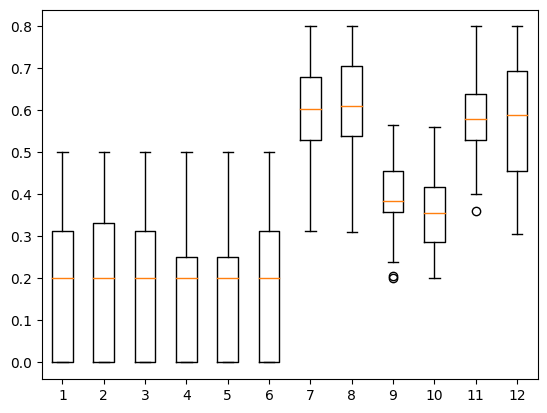

In [139]:
plt.boxplot(df_clean)
plt.show()

In [140]:
df_clean = df

In [141]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,7:].copy()

comparision of dataset before and after removing influential points

In [142]:
df.shape

(63, 12)

In [143]:
df.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [144]:
df_clean.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [145]:
df_clean.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


Corelation matrix

In [146]:
corr_matrix = weight_df.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,1.0,-0.2,-0.2,-0.2,-0.2,-0.2
Large ROE,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
Large S/P,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
Large Return Rate in the last quarter,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
Large Market Value,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
Small systematic Risk,-0.2,-0.2,-0.2,-0.2,-0.2,1.0


using seaborn

<Axes: >

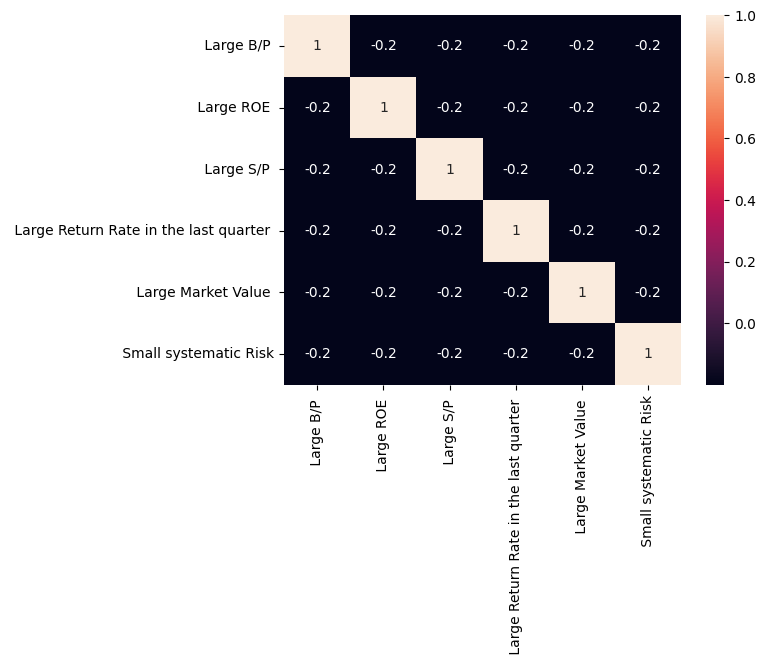

In [147]:
sns.heatmap(corr_matrix, annot=True)

using matlplotlib

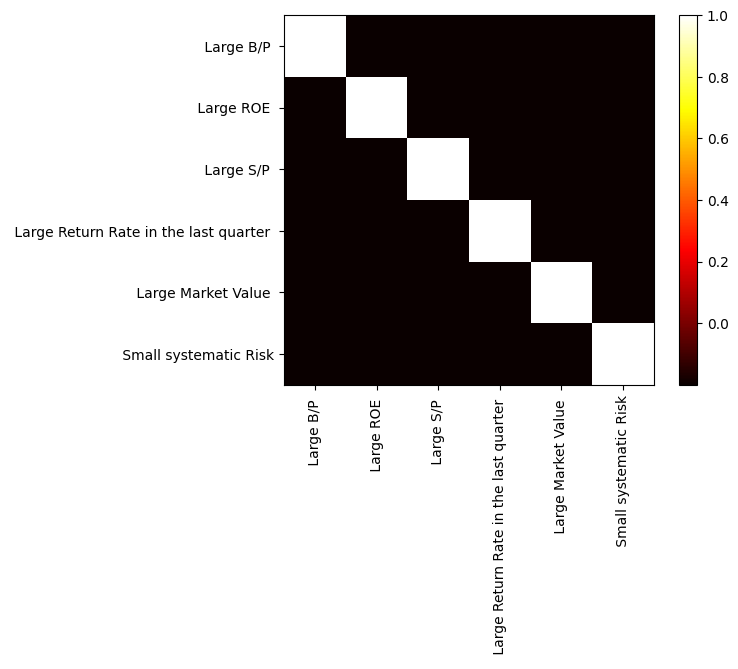

In [148]:
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

Bartlett's sphericity test

In [149]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(corr_matrix)

# Print the test results
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Chi-square value: nan
P-value: nan


d:\softwares\Codes\GIT HUB\Stock-portfolio-analysis-using-multivariate-linear-regression\ADAenv\Lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


p<0.5 : do PCA 

In [150]:
# standardize the data
PCA_stand = StandardScaler().fit_transform(weight_df)
PCA_stand.shape

(63, 6)

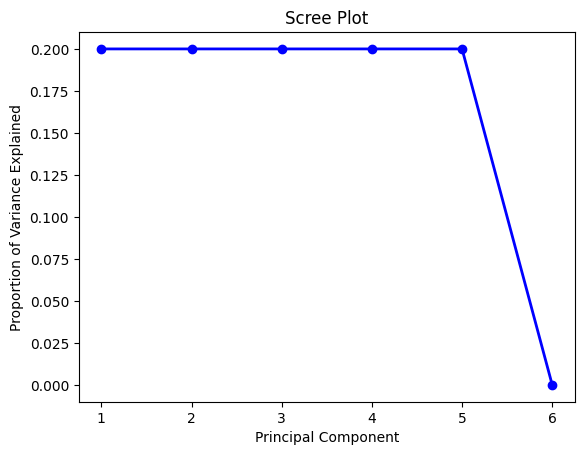

In [151]:
data_standardized = (weight_df - np.mean(weight_df, axis=0)) / np.std(weight_df, axis=0)

# Fit PCA model and transform the data
pca = PCA()
pca.fit(data_standardized)
pca_data = pca.transform(data_standardized)

# Generate scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [152]:

# perform PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_standardized)

# create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

# print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_ * 100)


[19.99999575 19.99999575 19.99999575 19.99999575 19.99999575]


In [153]:
# eigenVectors = pca.components_
# eigenVectors

In [154]:
(pca.explained_variance_ratio_ * 100).sum()


99.9999787309558

In [155]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,4.040123e-17,-2.795707e-17,3.504603e-16,2.380617e-16,4.617075e+00
1,2.426477e-02,4.142349e+00,-3.124828e-01,-1.790920e+00,-9.234150e-01
2,-2.220732e+00,9.584540e-02,-1.996578e+00,3.396694e+00,-9.234150e-01
3,4.269827e+00,-9.481734e-01,-7.748220e-01,8.566720e-01,-9.234150e-01
4,-1.402599e+00,-2.670062e+00,-1.298954e+00,-3.111413e+00,-9.234150e-01
...,...,...,...,...,...
58,-8.539653e-01,1.896347e-01,1.549644e-01,-1.713344e-01,1.846830e-01
59,4.441463e-01,-1.916908e-02,3.993156e-01,-6.793388e-01,1.846830e-01
60,-4.852953e-03,-8.284699e-01,6.249655e-02,3.581840e-01,1.846830e-01
61,-2.479074e-17,-2.222552e-16,6.659496e-17,7.434464e-17,-9.234150e-01


test and train data

In [156]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, outputs_df.iloc[:,0], test_size=0.3, random_state=20)

In [157]:
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the testing data
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)

# print the R^2 score
print('R^2 score:', score)


R^2 score: -0.28149745461755393


In [158]:
for i in range(6):
    plt.scatter(y_test.iloc[:, i], y_predict[:, i])
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"Output {i+1}")
    plt.show()

IndexingError: Too many indexers

Test of assumptions

1.Homoscedasticity

2.Normality

**QQ plot**

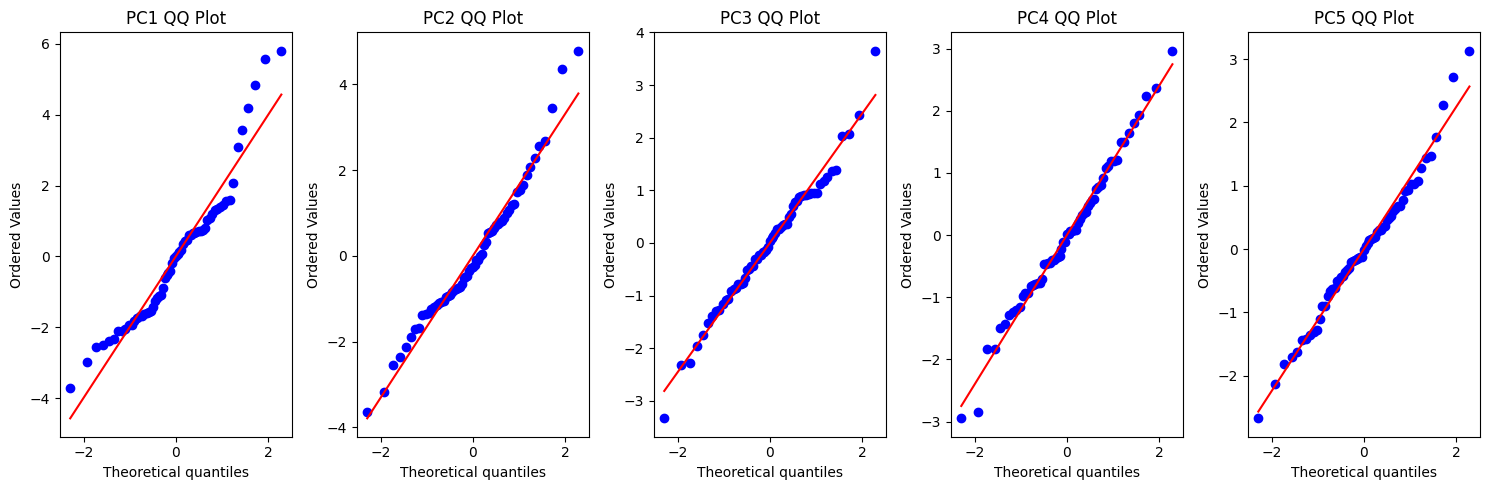

In [ ]:
import scipy.stats as stats

# create a figure with 5 subplots
fig, axs = plt.subplots(ncols=5, figsize=(15, 5))

# plot each QQ plot using Matplotlib
for i, col in enumerate(pca_df.columns):
    stats.probplot(pca_df[col], dist="norm", plot=axs[i])
    axs[i].set_title(f'{col} QQ Plot')

plt.tight_layout()
plt.show()


3.Multi Colinearity

**VIF**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# extract predictor variables and target variable
X = weight_df
y = outputs_df

# add a constant to the predictor variables
X = sm.add_constant(X)

# fit a linear regression model
model = sm.OLS(y, X).fit()

# calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Predictor"] = X.columns

# display the VIF table
print(vif)


     VIF Factor                                Predictor
0  3.339001e+06                                    const
1  1.306026e+05                               Large B/P 
2  1.306026e+05                               Large ROE 
3  1.306026e+05                               Large S/P 
4  1.306026e+05   Large Return Rate in the last quarter 
5  1.306026e+05                      Large Market Value 
6  1.306026e+05                    Small systematic Risk


4.Auto Corelation

**DW test**

In [ ]:
import statsmodels.api as sm

# loop through each column and calculate the DW test statistic
for col in pca_df.columns:
    X = pca_df[col]
    X = sm.add_constant(X)
    model = sm.OLS(pca_df['PC1'], X).fit()
    print(f"{col}: DW test statistic = {sm.stats.stattools.durbin_watson(model.resid)}")


PC1: DW test statistic = 1.7498656901966185
PC2: DW test statistic = 1.855842971468677
PC3: DW test statistic = 1.8558429714686766
PC4: DW test statistic = 1.8558429714686768
PC5: DW test statistic = 1.8558429714686764
